In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
sales = pd.read_csv('C:/Python/Class/Exercise/Exercise/6. Pandas Case Study 4 - Python Visualizations Case Study/SalesData.csv')
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

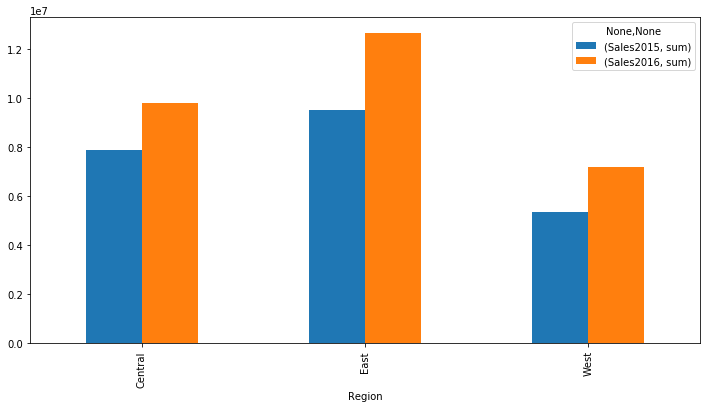

In [7]:
sales1 = sales.groupby(['Region']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

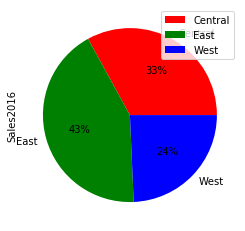

In [22]:
sales2 = sales.groupby(['Region'])[['Sales2016']].sum()

sales2.plot(kind='pie', 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

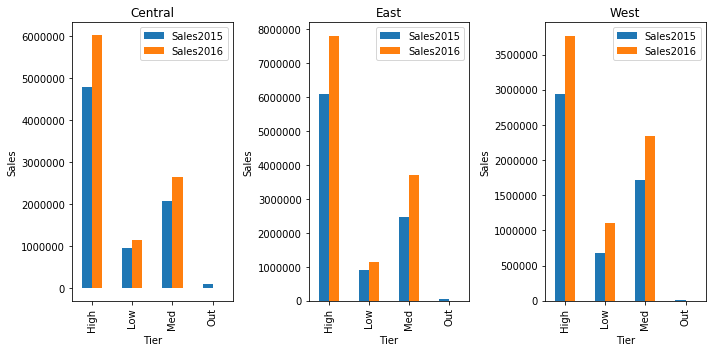

In [162]:
sales3 = sales.groupby(['Region','Tier']).aggregate({'Sales2015':'sum','Sales2016':'sum'}).reset_index()
sales3 = sales3.set_index('Tier')

regions = sales3['Region'].unique().tolist()
# Loop over Regions and visualize graphs using subplot
fig, ax = plt.subplots(ncols=len(regions), nrows=1, figsize=(10, 5))

for i in range(len(regions)):
    sales3[sales3['Region'] == regions[i]].plot(ax = ax[i],kind='bar')
    ax[i].set_title(regions[i])
    ax[i].set_ylabel('Sales')
plt.tight_layout()
plt.show()



### 4. In East region, which state registered a decline in 2016 as compared to 2015?

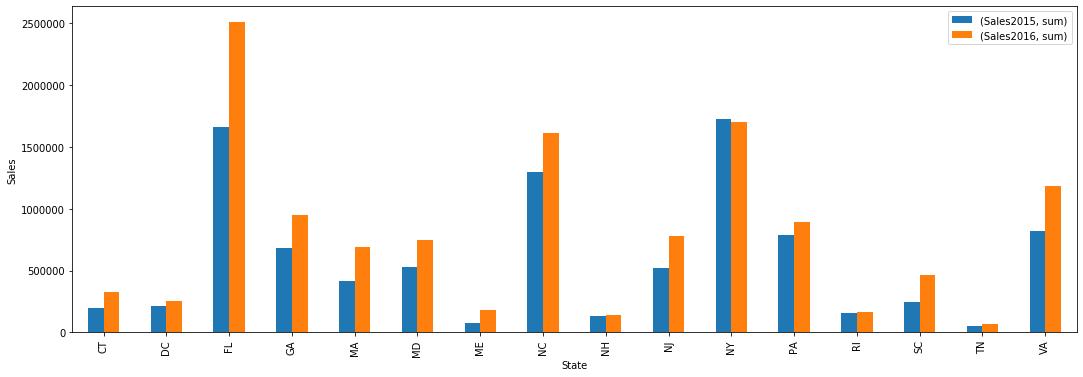

In [41]:
s = sales.loc[(sales.Region == 'East')]
sales4 = s.groupby(['State']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Sales')
plt.show()

# NY region declined.

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

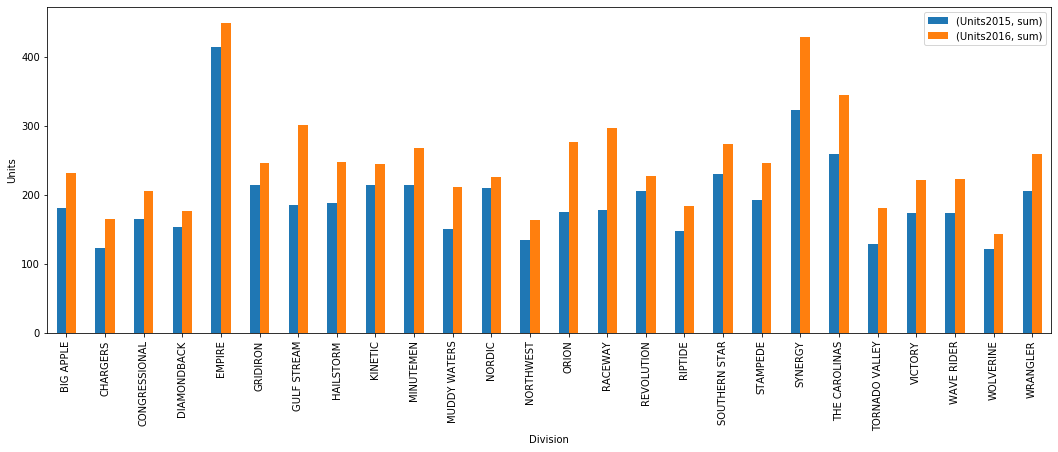

In [42]:
s1 = sales.loc[(sales.Tier == 'High')]
sales4 = s1.groupby(['Division']).aggregate({'Units2015':['sum'],'Units2016':['sum']})

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Units')
plt.show()

# none division declined

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [44]:
month = sales['Month']
sales['Qtr'] = np.where (month.isin(['Jan','Feb','Mar']), 'Q1', np.where(month.isin(['Apr','May','Jun']), 'Q2', np.where(month.isin(['Jul','Aug','Sep']), 'Q3', 'Q4')))
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


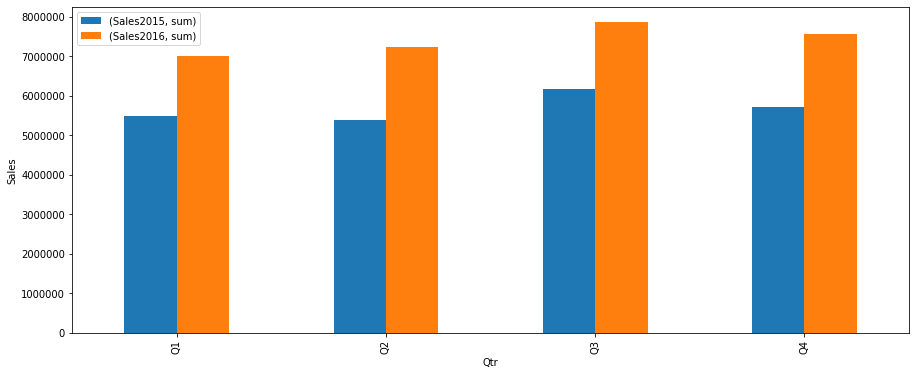

In [46]:
sales5 = sales.groupby(['Qtr']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})

sales5graph=sales5.plot.bar(figsize=(15,6))
plt.legend()
plt.ylabel('Sales')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [79]:
sales8 = sales[sales['Tier']!='Out'] # removing since it has negative values
sales8 = sales8.groupby(['Qtr','Tier'])[['Sales2016']].sum().reset_index()
#sales8
sales8_w = sales8.pivot(index='Tier',columns='Qtr',values='Sales2016')
sales8_w

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3867718.595,4.130953e+06,4.872559e+06,4.740002e+06
Low,948832.770,8.905948e+05,7.951777e+05,7.426594e+05
Med,2181401.879,2.215814e+06,2.197058e+06,2.085207e+06


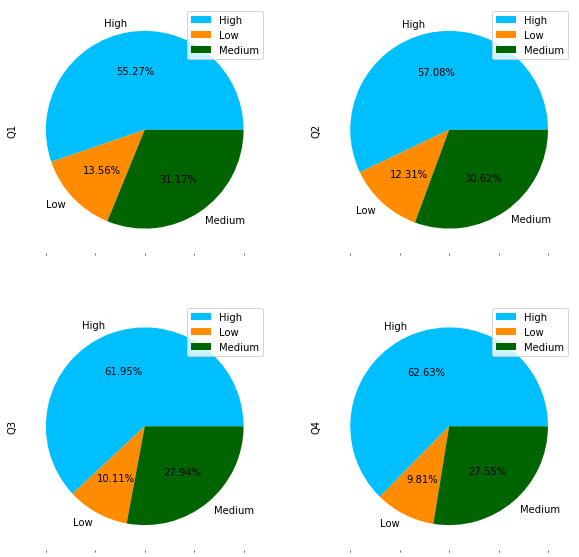

In [80]:
sales8_w.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%.2f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()